In [1]:
import pandas as pd
import numpy as np
import sklearn.cluster as sc
import matplotlib as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as pl

In [2]:
data = pd.read_excel('/Users/mateusz/Desktop/anomalie/25kLANGEVIN_DATA.xlsx', sep = ","  )

In [3]:
data.head()

,Time,Occupant Number,Occupancy 1,Occupancy 2,Survey Time,INDOOR Ambient Temp.,INDOOR Relative Humidity,INDOOR Air Velocity,INDOOR Mean Radiant Temp.,INDOOR Lumens,...,BLINDS effectiveness,Reported Discomfort to Management,Chooses set point that maximizes PRODUCTIVITY,Chooses set point that maximized COMFORT/PLEASURE,Wishes set point to stay at setting they choose,Chooses set point that is most agreeable to OTHERS,Chooses set point that is most ENERGY EFFICIENT,Chooses set point most in line with MGMT policies,Choooses set point most TYPICAL of office setting,Predicted Mean Vote (PMV)
0,3912-07-30 00:00:00,1,0,0,NaN,24.5847,63.517,0.030988,24.5847,NaN,...,0,NaN,1,1,2,4,2,2,4,-0.270899
1,3912-07-30 00:15:00.029000,1,0,0,NaN,24.5847,63.704,0.030988,24.5847,NaN,...,0,NaN,1,1,2,4,2,2,4,-0.269505
2,3912-07-30 00:29:59.971000,1,0,0,NaN,24.5847,63.856,0.030988,24.5847,NaN,...,0,NaN,1,1,2,4,2,2,4,-0.268373
3,3912-07-30 00:45:00,1,0,0,NaN,24.5847,64.039,0.030988,24.5847,NaN,...,0,NaN,1,1,2,4,2,2,4,-0.267009
4,3912-07-30 01:00:00.029000,1,0,0,NaN,24.4984,64.282,0.030988,24.4984,NaN,...,0,NaN,1,1,2,4,2,2,4,-0.297025


In [4]:
data = data.dropna(axis=1)

In [5]:
data.head()

,Time,Occupant Number,Occupancy 1,Occupancy 2,INDOOR Ambient Temp.,INDOOR Relative Humidity,INDOOR Air Velocity,INDOOR Mean Radiant Temp.,INDOOR CO2,OUTDOOR Ambient Temp.,...,General Satisfaction w/ Amount of Space,General Satisfaction w/ Privacy,General Thermal Comfort,General Satisfaction w/ Perceived Control,Fan/Heater Class,State of Fan/Heater,Current Thermostat COOLING Setpoint,Base Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Base Thermostat HEATING Setpoint
0,3912-07-30 00:00:00,1,0,0,24.5847,63.517,0.030988,24.5847,490.8,23,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444
1,3912-07-30 00:15:00.029000,1,0,0,24.5847,63.704,0.030988,24.5847,492.7,23,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444
2,3912-07-30 00:29:59.971000,1,0,0,24.5847,63.856,0.030988,24.5847,494.5,23,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444
3,3912-07-30 00:45:00,1,0,0,24.5847,64.039,0.030988,24.5847,494.5,23,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444
4,3912-07-30 01:00:00.029000,1,0,0,24.4984,64.282,0.030988,24.4984,490.8,23,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444


In [6]:
data = data.set_index('Time')

In [7]:
data.head()

,Occupant Number,Occupancy 1,Occupancy 2,INDOOR Ambient Temp.,INDOOR Relative Humidity,INDOOR Air Velocity,INDOOR Mean Radiant Temp.,INDOOR CO2,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,...,General Satisfaction w/ Amount of Space,General Satisfaction w/ Privacy,General Thermal Comfort,General Satisfaction w/ Perceived Control,Fan/Heater Class,State of Fan/Heater,Current Thermostat COOLING Setpoint,Base Thermostat COOLING Setpoint,Current Thermostat HEATING Setpoint,Base Thermostat HEATING Setpoint
Time,,,,,,,,,,,,,,,,,,,,,
3912-07-30 00:00:00,1,0,0,24.5847,63.517,0.030988,24.5847,490.8,23,89,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444
3912-07-30 00:15:00.029000,1,0,0,24.5847,63.704,0.030988,24.5847,492.7,23,89,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444
3912-07-30 00:29:59.971000,1,0,0,24.5847,63.856,0.030988,24.5847,494.5,23,89,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444
3912-07-30 00:45:00,1,0,0,24.5847,64.039,0.030988,24.5847,494.5,23,89,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444
3912-07-30 01:00:00.029000,1,0,0,24.4984,64.282,0.030988,24.4984,490.8,23,89,...,4,4,2,2,2,0,18.3333,25.5556,26.6667,24.4444


In [8]:
data.dtypes

Occupant Number                               int64
Occupancy 1                                   int64
Occupancy 2                                   int64
INDOOR Ambient Temp.                         object
INDOOR Relative Humidity                     object
INDOOR Air Velocity                          object
INDOOR Mean Radiant Temp.                    object
INDOOR CO2                                   object
OUTDOOR Ambient Temp.                        object
OUTDOOR Relative Humidity                    object
OUTDOOR Air Velocity                         object
Metabolic Rate (last 15 mins.)               object
Metabolic Rate (last 1 hour)                 object
Clothing Level                               object
Clothing Level (+ Chair)                     object
Min. Accept. Sensation (right now)           object
Med. Accept. Sensation (right now)           object
Max. Accept. Sensation (right now)           object
Min. Accept (seasonal median)                object
Med. Accept 

In [9]:
#choosing columns
columns = ['INDOOR Ambient Temp.','INDOOR Relative Humidity','INDOOR Air Velocity','INDOOR Mean Radiant Temp.',
           'OUTDOOR Ambient Temp.','OUTDOOR Relative Humidity','OUTDOOR Air Velocity']

In [10]:
data = data[columns]
data.head()

,INDOOR Ambient Temp.,INDOOR Relative Humidity,INDOOR Air Velocity,INDOOR Mean Radiant Temp.,OUTDOOR Ambient Temp.,OUTDOOR Relative Humidity,OUTDOOR Air Velocity
Time,,,,,,,
3912-07-30 00:00:00,24.5847,63.517,0.030988,24.5847,23,89,1.34112
3912-07-30 00:15:00.029000,24.5847,63.704,0.030988,24.5847,23,89,1.34112
3912-07-30 00:29:59.971000,24.5847,63.856,0.030988,24.5847,23,89,1.34112
3912-07-30 00:45:00,24.5847,64.039,0.030988,24.5847,23,89,0.89408
3912-07-30 01:00:00.029000,24.4984,64.282,0.030988,24.4984,23,89,0.89408


In [11]:
data.dtypes

INDOOR Ambient Temp.         object
INDOOR Relative Humidity     object
INDOOR Air Velocity          object
INDOOR Mean Radiant Temp.    object
OUTDOOR Ambient Temp.        object
OUTDOOR Relative Humidity    object
OUTDOOR Air Velocity         object
dtype: object

In [12]:
data = data.dropna()

In [13]:
for i in range(7):
    data[columns[i]] = pd.to_numeric(data[columns[i]], errors ='coerse')

In [14]:
data.dtypes

INDOOR Ambient Temp.         float64
INDOOR Relative Humidity     float64
INDOOR Air Velocity          float64
INDOOR Mean Radiant Temp.    float64
OUTDOOR Ambient Temp.        float64
OUTDOOR Relative Humidity    float64
OUTDOOR Air Velocity         float64
dtype: object

In [15]:
data = data.dropna()

In [16]:
data = preprocessing.StandardScaler().fit_transform(data)

In [17]:
data

array([[ 1.4109451 ,  1.78643733,  1.59666233, ...,  1.04594123,
         1.22121759, -1.106619  ],
       [ 1.4109451 ,  1.80105684,  1.59666233, ...,  1.04594123,
         1.22121759, -1.106619  ],
       [ 1.4109451 ,  1.81294008,  1.59666233, ...,  1.04594123,
         1.22121759, -1.106619  ],
       ...,
       [-1.44133297, -1.81754641, -0.6263065 , ..., -1.90214369,
        -0.91930045,  1.08383986],
       [-1.48551099, -1.81754641, -0.6263065 , ..., -1.90214369,
        -0.91930045,  1.08383986],
       [-1.44133297, -1.81746823, -0.6263065 , ..., -1.69882749,
        -1.45442996,  1.30288574]])

In [18]:
model = DBSCAN(eps=0.9, min_samples=15).fit(data)

In [19]:
model.labels_

array([0, 0, 0, ..., 2, 2, 2])

In [20]:
n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)

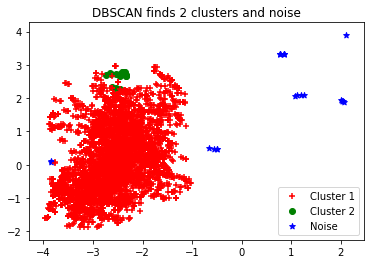

In [22]:
pca = PCA(n_components=2).fit(data)
pca_2d = pca.transform(data)
for i in range(0, pca_2d.shape[0]):
    if model.labels_[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif model.labels_[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif model.labels_[i] == -1:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
pl.title('DBSCAN finds 2 clusters and noise')
pl.show()